In [ ]:
import torch #It is core PyTorch library, used for tensor operations, creating models and performing computations on GPUs.
import torch.nn as nn # It Contains modules, layers, and functions to build neural networks (e.g., nn.Linear, nn.ReLU, etc.).
import torch.optim as optim #Provides optimization algorithms to update model parameters during training.
from torch.utils.data import DataLoader # A utility to handle data batching and shuffling during training and testing.
import torchvision # A library that includes pre-trained models, datasets, and utility functions for image data.
import torchvision.transforms as transforms # Functions to preprocess and augment images, such as resizing, normalizing, and converting to tensors.





In [ ]:
# transform is used to Chains multiple transformations together.
transform=transforms.Compose([transforms.Grayscale(num_output_channels=1),
                              transforms.Resize((28,28)),
                              transforms.ToTensor(), # Converts image data to PyTorch tensors and scales pixel values from [0, 255] to [0, 1].
                              transforms.Normalize((0.5),(0.5))]) # Normalize normalizes image data.

In [ ]:
trainset=torchvision.datasets.MNIST(root="/data",train=True,download=True,transform=transform) #torchvision.datasets.MNIST,downloads and loads the MNIST dataset
testset=torchvision.datasets.MNIST(root="/data",train=False,download=True,transform=transform)
trainloader=DataLoader(trainset,batch_size=64,shuffle=True) # DataLoader Splits the dataset into small batches of size 64 for training
testloader=DataLoader(testset,batch_size=64,shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 49.7MB/s]


Extracting /data/MNIST/raw/train-images-idx3-ubyte.gz to /data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.98MB/s]

Extracting /data/MNIST/raw/train-labels-idx1-ubyte.gz to /data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 12.8MB/s]


Extracting /data/MNIST/raw/t10k-images-idx3-ubyte.gz to /data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.70MB/s]

Extracting /data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /data/MNIST/raw



In [ ]:
import torch
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        # Original layers
        self.fc1 = nn.Linear(28*28, 128)  # Input layer
        self.fc2 = nn.Linear(128, 64)    # Hidden layer 1
        self.fc3 = nn.Linear(64, 32)     # Hidden layer 2
        self.fc4 = nn.Linear(32, 10)     # Output layer

        # Activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        # Flatten input
        x = x.view(-1, 28*28)

        # Pass through layers with ReLU activations
        x = self.relu(self.fc1(x))  # First layer + ReLU
        x = self.relu(self.fc2(x))  # Second layer + ReLU
        x = self.relu(self.fc3(x))  # Third layer + ReLU
        x = self.fc4(x)             # Output layer (no activation for logits)

        return x



In [ ]:
model = MLP()# Instantiate the model, loss function, and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)



In [ ]:
# Training loop with increased epochs
epochs = 5
for epoch in range(epochs):
  model.train() # Set model to training mode
  running_loss = 0.0
  correct =0
  total =0
  for inputs, labels in trainloader:
    optimizer.zero_grad()
    outputs = model(inputs)    # Forward pass
    loss = criterion(outputs ,labels )
        # Backward pass and optimization
    loss.backward()
    optimizer.step()
 # Calculate statistics
    running_loss += loss.item()
    _,predicted = torch.max(outputs,1)
    total +=labels.size(0)
    correct +=(predicted ==labels).sum().item()

  print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(trainloader)} , Accuracy: {100*correct/total}")

Epoch 1/5, Loss: 0.46435056929426916 , Accuracy: 85.84833333333333
Epoch 2/5, Loss: 0.2120305897711691 , Accuracy: 93.60666666666667
Epoch 3/5, Loss: 0.15424640882394905 , Accuracy: 95.26
Epoch 4/5, Loss: 0.12255284585543215 , Accuracy: 96.20833333333333
Epoch 5/5, Loss: 0.10917686987747706 , Accuracy: 96.65


In [ ]:
model.eval() # Set model to evaluation mode
correct =0
total =0
act_labels =torch.tensor([])
model_predicted =torch.tensor([])

with torch.no_grad():
  for inputs, labels in testloader:
    outputs =model(inputs)
    act_labels = torch.cat((act_labels ,labels ) ,dim =0)
    _, predicted = torch.max(outputs,1)
    model_predicted = torch.cat((model_predicted ,predicted),dim=0 )
    total +=labels.size(0)
    correct += (predicted ==labels).sum().item()
print(f"Test Accuracy: {100*correct/total:.2f}")

Test Accuracy: 96.77


In [ ]:
from PIL import Image
def test_single_img(img_path ,model):
  img = Image.open(img_path)
  img  = transform(img).unsqueeze(0)
  model.eval()

  with torch.no_grad():
    outputs = model(img)
    _,predicted = torch.max(outputs,1)
  return predicted.item()


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving ML.png to ML.png


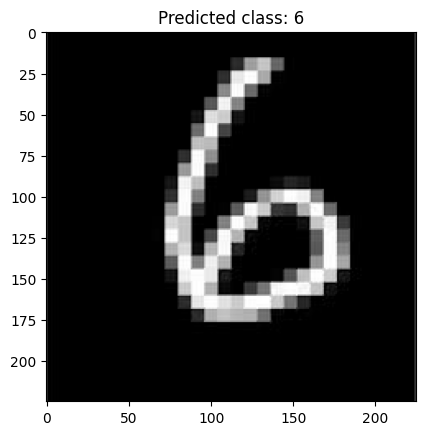

In [ ]:
import matplotlib.pyplot as plt


img_path = "/content/ML_6.png"

predicted_class = test_single_img(img_path,model)

img = Image.open(img_path)
plt.imshow(img, cmap ="gray")
plt.title(f"Predicted class: {predicted_class}")
plt.show()

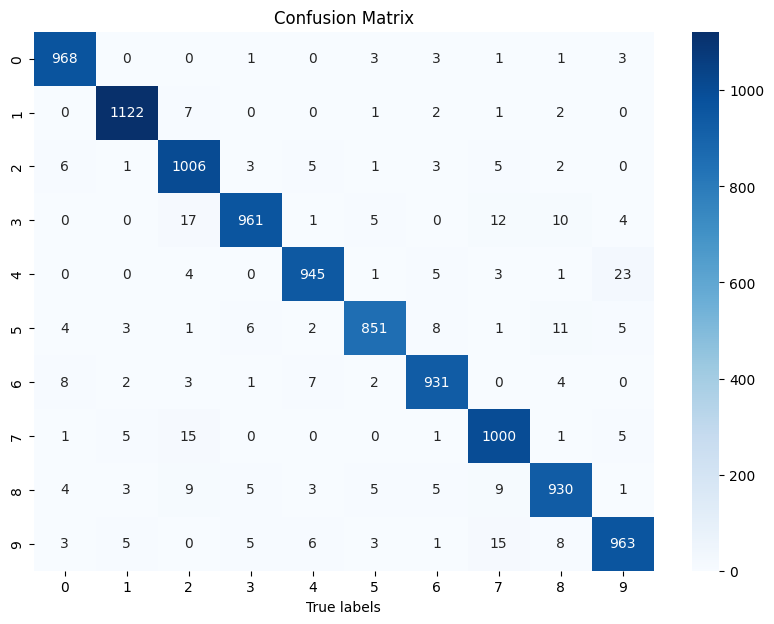

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(act_labels ,model_predicted )

plt.figure(figsize =(10,7))
sns.heatmap(cm,annot=True ,fmt ='g' ,cmap ="Blues" ,xticklabels=np.arange(10) ,yticklabels=np.arange(10))

plt.title("Confusion Matrix")
plt.xlabel("Predicted, labels")
plt.xlabel("True labels")
plt.show()
